[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemanth1403/Machine-Learning/blob/main/EndToEndML_16-07-24.ipynb)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./placement.csv")

## Steps

#### 1. Preprocessing + EDA + Feature selection
#### 2. Extract input and output cols
#### 3. Scale the values
#### 4. Split the data into train and test
#### 5. Train the model
#### 6. Evaluate the model/model selection
#### 6. Deploy the model

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df = df.iloc[:, 1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

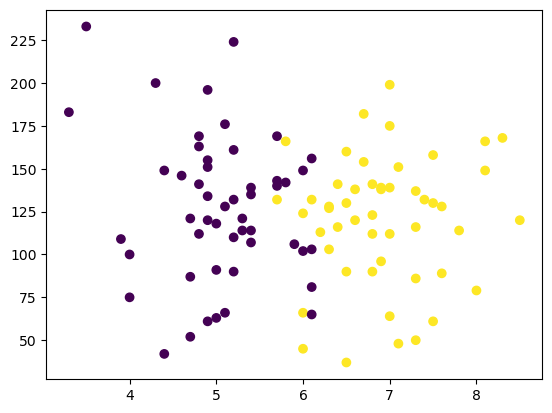

In [8]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [9]:
X = df.iloc[:, 0:2]
Y = df.iloc[:, -1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.49342232,  0.10409339],
       [-0.47134591, -0.23746305],
       [-0.47134591,  0.27487161],
       [-1.09649944, -1.75007015],
       [ 0.95757644, -1.45730748],
       [ 1.22549938, -0.92057593],
       [ 0.15380761, -1.04256038],
       [ 0.06449997,  0.00650584],
       [-0.20342297,  0.20168095],
       [-1.36442238, -1.99403903],
       [ 0.77896114,  0.42125294],
       [-0.91788415,  0.25047472],
       [-0.47134591,  0.37245917],
       [-1.0071918 , -0.28625683],
       [ 1.93996055,  0.61642805],
       [-0.91788415,  0.66522183],
       [ 0.86826879,  0.37245917],
       [-0.20342297,  1.10436583],
       [-1.36442238,  0.61642805],
       [ 0.77896114, -0.01789105],
       [ 1.22549938, -0.18866927],
       [ 0.06449997, -1.92084837],
       [-0.20342297,  0.39685606],
       [-0.91788415, -0.09108172],
       [-2.3468065 ,  1.44592227],
       [-1.45373003,  1.86066938],
       [-2.16819121,  2.6657667 ],
       [-0.64996121, -0.82298838],
       [ 0.86826879,

In [17]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.95757644, -0.28625683],
       [ 0.5110382 , -0.82298838],
       [ 0.60034585, -0.09108172],
       [ 0.6896535 ,  0.7384125 ],
       [ 1.40411467,  0.15288717],
       [ 0.33242291,  0.0796965 ],
       [-1.72165297, -1.18894171],
       [-0.56065356, -0.23746305],
       [ 1.31480702,  0.20168095],
       [ 2.11857585,  1.07996894]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [22]:
y_test

29    1
79    1
20    1
74    1
83    1
70    1
68    0
46    0
3     1
53    1
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

1.0

In [26]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [27]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

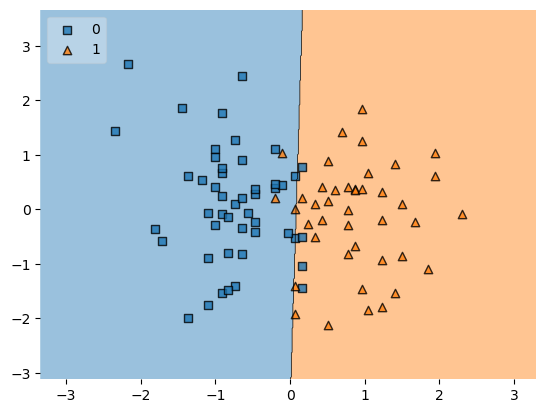

In [28]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [29]:
import pickle

In [30]:
pickle.dump(clf, open('LRModel(16-07-24).pkl', 'wb'))